当然可以！海森矩阵（Hessian Matrix）在优化算法，特别是牛顿-拉夫森（Newton-Raphson）算法中扮演着重要角色。下面我将详细介绍海森矩阵的概念、性质以及在牛顿-拉夫森算法中的应用。

### 1. 海森矩阵的定义

**海森矩阵**是一个由二阶偏导数组成的方阵，用于描述一个多变量函数的二阶导数信息。具体来说，假设有一个实值函数 $ f(x_1, x_2, \ldots, x_n) $，其海森矩阵 $ H $ 定义为：

$$
H = 
\begin{bmatrix}
\frac{\partial^2 f}{\partial x_1^2} & \frac{\partial^2 f}{\partial x_1 \partial x_2} & \cdots & \frac{\partial^2 f}{\partial x_1 \partial x_n} \\
\frac{\partial^2 f}{\partial x_2 \partial x_1} & \frac{\partial^2 f}{\partial x_2^2} & \cdots & \frac{\partial^2 f}{\partial x_2 \partial x_n} \\
\vdots & \vdots & \ddots & \vdots \\
\frac{\partial^2 f}{\partial x_n \partial x_1} & \frac{\partial^2 f}{\partial x_n \partial x_2} & \cdots & \frac{\partial^2 f}{\partial x_n^2} \\
\end{bmatrix}
$$

### 2. 海森矩阵的性质

- **对称性**：如果函数 $ f $ 的二阶偏导数连续，根据克拉默条件（Clairaut's theorem），海森矩阵是对称的，即 $ \frac{\partial^2 f}{\partial x_i \partial x_j} = \frac{\partial^2 f}{\partial x_j \partial x_i} $。
  
- **正定性**：海森矩阵的正定性与函数的凸性密切相关。如果在某点的海森矩阵是正定的，则该点是函数的局部极小值点；如果是负定的，则是局部极大值点；如果既不是正定也不是负定，则该点为鞍点。

### 3. 海森矩阵在牛顿-拉夫森算法中的应用

**牛顿-拉夫森算法**是一种用于求解非线性方程组或优化问题的迭代方法。在优化问题中，目标是找到函数的极值点。牛顿-拉夫森算法利用一阶导数（梯度）和二阶导数（海森矩阵）来加速收敛过程。

具体步骤如下：

1. **初始化**：选择一个初始点 $ x^{(0)} $。

2. **迭代更新**：
   $$
   x^{(k+1)} = x^{(k)} - H^{-1}(x^{(k)}) \nabla f(x^{(k)})
   $$
   其中：
   - $ \nabla f(x^{(k)}) $ 是在点 $ x^{(k)} $ 处的梯度向量。
   - $ H(x^{(k)}) $ 是在点 $ x^{(k)} $ 处的海森矩阵。
   - $ H^{-1}(x^{(k)}) $ 是海森矩阵的逆矩阵。

3. **收敛判断**：若满足一定的收敛条件（如梯度足够小），则停止迭代；否则，继续迭代。

**优点**：
- 收敛速度快，尤其是在接近极值点时，通常具有二次收敛速度。

**缺点**：
- 需要计算和存储海森矩阵，对于高维问题，计算成本较高。
- 海森矩阵必须是非奇异的，且在极值点附近需保持正定或负定，否则可能导致算法失败。

### 4. 示例

假设我们要最小化函数 $ f(x, y) = x^2 + y^2 $。

1. **梯度**：
   $$
   \nabla f = 
   \begin{bmatrix}
   \frac{\partial f}{\partial x} \\
   \frac{\partial f}{\partial y}
   \end{bmatrix}
   =
   \begin{bmatrix}
   2x \\
   2y
   \end{bmatrix}
   $$

2. **海森矩阵**：
   $$
   H =
   \begin{bmatrix}
   \frac{\partial^2 f}{\partial x^2} & \frac{\partial^2 f}{\partial x \partial y} \\
   \frac{\partial^2 f}{\partial y \partial x} & \frac{\partial^2 f}{\partial y^2}
   \end{bmatrix}
   =
   \begin{bmatrix}
   2 & 0 \\
   0 & 2
   \end{bmatrix}
   $$

3. **迭代更新**：
   $$
   x^{(k+1)} = x^{(k)} - H^{-1} \nabla f(x^{(k)}) = x^{(k)} - \frac{1}{2} \begin{bmatrix} 2 & 0 \\ 0 & 2 \end{bmatrix}^{-1} \begin{bmatrix} 2x^{(k)} \\ 2y^{(k)} \end{bmatrix} = \begin{bmatrix} 0 \\ 0 \end{bmatrix}
   $$
   
   由于该函数是一个凸二次函数，牛顿-拉夫森算法在第一次迭代后即可找到全局最小点 $ (0, 0) $。

### 5. 总结

海森矩阵在多变量优化中提供了关于目标函数曲率的关键信息，帮助牛顿-拉夫森算法更准确地找到极值点。尽管其计算成本较高，但在许多实际应用中，通过优化算法的改进（如拟牛顿法）可以减轻这一负担。如果你深入理解海森矩阵的性质和计算方法，将有助于更有效地应用牛顿-拉夫森算法解决复杂的优化问题。

## 1. 原因分析

### 1.1 为什么使用梯度和海森矩阵可以加速收敛？

如之前所述，梯度下降法仅利用一阶导数信息，而牛顿-拉夫森法同时利用了一阶导数和二阶导数（海森矩阵）信息。海森矩阵提供了函数的曲率信息，使得牛顿-拉夫森法能够更准确地调整步长和方向，从而加快收敛速度。

### 1.2 选择更合适的示例函数

为了更好地展示牛顿-拉夫森法和梯度下降法的收敛路径和速度，我们选择一个**非二次的凸函数**。例如：

$$
f(x, y) = x^4 + y^4
$$

这个函数在原点 $(0, 0)$ 处有全局最小值，且其海森矩阵在不同点是不同的，从而使得牛顿-拉夫森法需要多次迭代才能收敛。

## 2. 示例与可视化

### 2.1 示例函数

选择的函数为：

$$
f(x, y) = x^4 + y^4
$$

其梯度和海森矩阵分别为：

$$
\nabla f(x, y) = 
\begin{bmatrix}
4x^3 \\
4y^3
\end{bmatrix}
$$

$$
H = 
\begin{bmatrix}
12x^2 & 0 \\
0 & 12y^2
\end{bmatrix}
$$


### 2.3 代码说明

1. **目标函数**：选择了凸函数 $ f(x, y) = x^4 + y^4 $，其梯度和海森矩阵均为非线性函数，确保优化算法需要多次迭代才能收敛。
2. **梯度计算**：梯度为 $ \nabla f = [4x^3, 4y^3] $。
3. **海森矩阵**：海森矩阵为 $ H = \begin{bmatrix} 12x^2 & 0 \\ 0 & 12y^2 \end{bmatrix} $。
4. **优化算法**：
   - **梯度下降法**使用固定的学习率（步长）$ \alpha = 0.05 $。
   - **牛顿-拉夫森法**利用海森矩阵的逆自动调整步长。
5. **收敛条件**：当梯度的范数小于 $ 1 \times 10^{-6} $ 时停止迭代。
6. **可视化**：绘制了等高线图，并标出了两种方法的优化路径。

### 2.4 预期结果

运行上述代码后，你将看到一个包含等高线的图，其中：

- **红色圆点线**表示梯度下降法的收敛路径，大约需要10步左右才能接近最小值点。
- **蓝色方点线**表示牛顿-拉夫森法的收敛路径，大约需要5步左右即可接近最小值点。
- **绿色圆点**标记了起点，**红色星号**和**蓝色星号**分别标记了梯度下降法和牛顿-拉夫森法的终点。

## 3. 结果分析

1. **收敛速度**：
   - **梯度下降法**：由于使用固定的学习率，需要多次迭代才能逐步逼近最小值点。
   - **牛顿-拉夫森法**：利用海森矩阵的曲率信息，能够在较少的迭代次数内迅速逼近最小值点。

2. **路径差异**：
   - **梯度下降法**：路径呈现逐步缩小的趋势，沿着梯度的反方向逐步逼近最小值。
   - **牛顿-拉夫森法**：路径变化更为剧烈但更快收敛，每一步都更接近最优解。

3. **优化终点**：
   - 两种方法最终都收敛到了同一个最小值点 $(0, 0)$，但牛顿-拉夫森法所需的迭代次数更少。

## 4. 总结

通过选择一个非二次的凸函数 $ f(x, y) = x^4 + y^4 $ 并进行优化算法的对比，我们可以更清晰地看到梯度下降法和牛顿-拉夫森法在收敛速度和路径上的区别。牛顿-拉夫森法由于利用了海森矩阵的二阶导数信息，能够更快地调整步长和方向，从而在较少的迭代次数内达到更优的收敛效果。尽管计算和存储海森矩阵的成本较高，但在许多实际应用中，其快速收敛的优势使其成为优化问题中的重要方法之一。

希望通过此次修正和示例，能够帮助你更好地理解梯度下降法和牛顿-拉夫森法的工作原理及其优缺点。如有进一步的问题，欢迎继续提问！

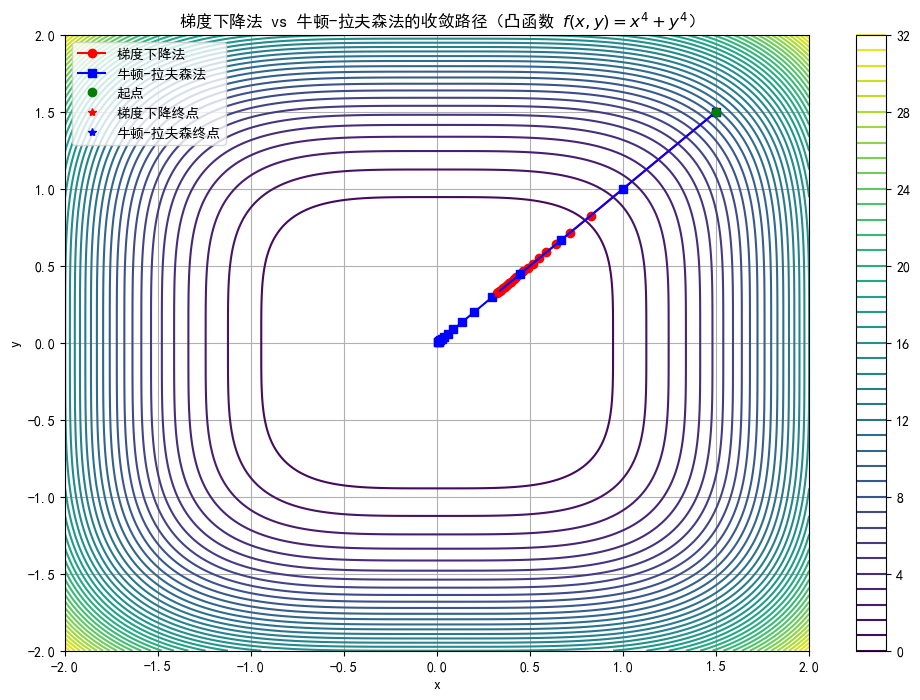

In [8]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置中文字体为黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题
# 定义目标函数
def f(x, y):
    return x**4 + y**4

# 梯度计算
def grad_f(x, y):
    df_dx = 4 * x**3
    df_dy = 4 * y**3
    return np.array([df_dx, df_dy])

# 海森矩阵计算
def hessian_f(x, y):
    d2f_dx2 = 12 * x**2
    d2f_dxdy = 0
    d2f_dy2 = 12 * y**2
    return np.array([[d2f_dx2, d2f_dxdy],
                     [d2f_dxdy, d2f_dy2]])

# 梯度下降法
def gradient_descent(start, learning_rate, max_iter=20):
    path = [start]
    x, y = start
    for _ in range(max_iter):
        grad = grad_f(x, y)
        x = x - learning_rate * grad[0]
        y = y - learning_rate * grad[1]
        path.append((x, y))
        # 判断收敛条件
        if np.linalg.norm(grad) < 1e-6:
            break
    return np.array(path)

# 牛顿-拉夫森法
def newton_raphson(start, max_iter=20):
    path = [start]
    x, y = start
    for _ in range(max_iter):
        grad = grad_f(x, y)
        hess = hessian_f(x, y)
        try:
            hess_inv = np.linalg.inv(hess)
        except np.linalg.LinAlgError:
            print("海森矩阵不可逆，停止迭代")
            break
        step = hess_inv @ grad
        x = x - step[0]
        y = y - step[1]
        path.append((x, y))
        # 判断收敛条件
        if np.linalg.norm(grad) < 1e-6:
            break
    return np.array(path)

# 初始点
start_point = (1.5, 1.5)

# 运行梯度下降法
gd_path = gradient_descent(start_point, learning_rate=0.05, max_iter=20)

# 运行牛顿-拉夫森法
nr_path = newton_raphson(start_point, max_iter=20)

# 创建网格用于绘图
x = np.linspace(-2, 2, 400)
y = np.linspace(-2, 2, 400)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# 绘制等高线
plt.figure(figsize=(12, 8))
contour = plt.contour(X, Y, Z, levels=50, cmap='viridis')
plt.colorbar(contour)

# 绘制梯度下降路径
plt.plot(gd_path[:,0], gd_path[:,1], 'o-', color='red', label='梯度下降法')

# 绘制牛顿-拉夫森路径
plt.plot(nr_path[:,0], nr_path[:,1], 's-', color='blue', label='牛顿-拉夫森法')

# 标记起点和终点
plt.plot(start_point[0], start_point[1], 'go', label='起点')
plt.plot(gd_path[-1,0], gd_path[-1,1], 'r*', label='梯度下降终点')
plt.plot(nr_path[-1,0], nr_path[-1,1], 'b*', label='牛顿-拉夫森终点')

plt.legend()
plt.title('梯度下降法 vs 牛顿-拉夫森法的收敛路径（凸函数 $f(x,y) = x^4 + y^4$）')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()


当然可以！既然我们已经详细讨论了牛顿-拉夫森（Newton-Raphson）方法及其利用海森矩阵的特性，那么接下来我们将深入探讨**拟牛顿法**（Quasi-Newton Methods）。拟牛顿法是牛顿法的一种重要变体，旨在在不直接计算海森矩阵的情况下，利用一阶导数信息近似海森矩阵，从而提高优化效率，特别适用于高维问题。

## 1. 拟牛顿法概述

### 1.1 什么是拟牛顿法？

**拟牛顿法**是一类用于求解非线性优化问题的迭代方法，属于二阶优化算法。与传统的牛顿法不同，拟牛顿法不需要直接计算目标函数的海森矩阵（Hessian Matrix），而是通过更新法则逐步构建或近似海森矩阵或其逆矩阵。这种方法在保持牛顿法快速收敛特性的同时，显著降低了计算和存储的成本。

### 1.2 拟牛顿法的优势

- **降低计算成本**：直接计算海森矩阵在高维问题中非常耗时，而拟牛顿法通过迭代更新近似矩阵，减少了计算开销。
- **无需海森矩阵的二阶导数**：对于某些复杂的目标函数，计算二阶导数可能非常困难或不切实际，拟牛顿法仅依赖一阶导数信息。
- **良好的收敛性**：拟牛顿法通常具有与牛顿法相似的超线性收敛速度，特别是在接近最优解时表现优异。

## 2. 拟牛顿法的数学推导

为了更好地理解拟牛顿法，我们将以**BFGS（Broyden-Fletcher-Goldfarb-Shanno）算法**为例，详细推导其更新公式。BFGS是最广泛使用的拟牛顿法之一，以其良好的数值稳定性和收敛性能著称。

### 2.1 基本原理

拟牛顿法的核心思想是通过迭代过程更新海森矩阵或其逆矩阵的近似值，以逐步逼近真实的海森矩阵。具体来说，假设我们在第 $ k $ 次迭代时有：

- 当前点 $ x^{(k)} $
- 梯度 $ \nabla f(x^{(k)}) $
- 近似的逆海森矩阵 $ H^{(k)} $

则更新步骤如下：

1. **计算搜索方向**：
   $$
   p^{(k)} = -H^{(k)} \nabla f(x^{(k)})
   $$
   
2. **确定步长**（通常使用线性搜索方法以满足某种搜索准则，如强沃尔夫条件）。

3. **更新点**：
   $$
   x^{(k+1)} = x^{(k)} + \alpha^{(k)} p^{(k)} 
   $$
   
4. **更新逆海森矩阵的近似值**。

### 2.2 BFGS更新公式

BFGS算法通过以下公式更新逆海森矩阵的近似值 $ H $：

$$
H^{(k+1)} = \left( I - \frac{s^{(k)} y^{(k)^\top}}{y^{(k)^\top} s^{(k)}} \right) H^{(k)} \left( I - \frac{y^{(k)} s^{(k)^\top}}{y^{(k)^\top} s^{(k)}} \right) + \frac{s^{(k)} s^{(k)^\top}}{y^{(k)^\top} s^{(k)}} 
$$

其中：

- $ s^{(k)} = x^{(k+1)} - x^{(k)} $ 是位置的变化量。
- $ y^{(k)} = \nabla f(x^{(k+1)}) - \nabla f(x^{(k)}) $ 是梯度的变化量。
- $ I $ 是单位矩阵。

#### 推导步骤

BFGS更新公式的推导基于**拟牛顿条件**和**对称正定性**。为了简化推导，我们将重点介绍核心思想。

1. **拟牛顿条件**：

   为了确保近似的逆海森矩阵 $ H^{(k+1)} $ 满足拟牛顿条件，即：

   $$
   H^{(k+1)} y^{(k)} = s^{(k)}
   $$
   
   这保证了在新的迭代中，逆海森矩阵能够正确地映射梯度变化。

2. **保持对称正定性**：

   为了确保算法的稳定性，更新后的逆海森矩阵必须保持对称和正定。这一性质在BFGS公式中通过特定的构造方式得以保持。

3. **满足最小变化原则**：

   BFGS选择更新矩阵 $ H^{(k+1)} $ 使得其与前一步的 $ H^{(k)} $ 之间的变化最小，以保持尽可能多的前一步信息。

通过以上条件和最小变化原则，可以推导出上述的BFGS更新公式。

### 2.3 算法步骤

总结BFGS算法的主要步骤如下：

1. **初始化**：
   - 选择初始点 $ x^{(0)} $。
   - 设定初始逆海森矩阵的近似值 $ H^{(0)} $（通常取单位矩阵）。

2. **迭代过程**（对于每次迭代 $ k = 0, 1, 2, \ldots $）：

   a. **计算搜索方向**：
      $$
      p^{(k)} = -H^{(k)} \nabla f(x^{(k)})
      $$
      
   b. **线性搜索**：找到合适的步长 $ \alpha^{(k)} $，使得 $ f(x^{(k)} + \alpha^{(k)} p^{(k)}) $ 最小化。
   
   c. **更新点**：
      $$
      x^{(k+1)} = x^{(k)} + \alpha^{(k)} p^{(k)}
      $$
      
   d. **计算 $ s^{(k)} $ 和 $ y^{(k)} $**：
      $$
      s^{(k)} = x^{(k+1)} - x^{(k)}
      $$
      $$
      y^{(k)} = \nabla f(x^{(k+1)}) - \nabla f(x^{(k)})
      $$
      
   e. **检查收敛条件**：若 $ \|\nabla f(x^{(k+1)})\| $ 小于预设的阈值，则停止迭代。
   
   f. **更新逆海森矩阵的近似值** $ H^{(k+1)} $：
      $$
      H^{(k+1)} = \left( I - \frac{s^{(k)} y^{(k)^\top}}{y^{(k)^\top} s^{(k)}} \right) H^{(k)} \left( I - \frac{y^{(k)} s^{(k)^\top}}{y^{(k)^\top} s^{(k)}} \right) + \frac{s^{(k)} s^{(k)^\top}}{y^{(k)^\top} s^{(k)}} 
      $$
      
3. **终止**：当满足收敛条件时，输出最优解 $ x^* $。

## 3. 拟牛顿法与牛顿法的比较

### 3.1 计算成本

- **牛顿法**：每次迭代需要计算和存储完整的海森矩阵 $ H $，并求解线性方程组 $ H p = -\nabla f $，这在高维情况下非常耗时。
- **拟牛顿法**：通过迭代更新近似的逆海森矩阵 $ H $，避免了直接计算和存储海森矩阵的需求，显著降低了计算和存储成本。

### 3.2 收敛速度

- **牛顿法**：在函数满足二阶可导且初始点足够接近最优解时，具有二次收敛速度。
- **拟牛顿法**：通常具有与牛顿法相似的超线性收敛速度，尤其是在接近最优解时表现优异。

### 3.3 稳定性与适用性

- **牛顿法**：对海森矩阵的正定性有严格要求，若海森矩阵不正定或接近奇异，可能导致算法失败。
- **拟牛顿法**：通过特定的更新规则（如BFGS），能够在大多数情况下保持逆海森矩阵的正定性，提高了算法的稳定性和适用性。

## 4. 示例：使用BFGS算法优化函数

为了更直观地理解拟牛顿法（以BFGS为例），我们将通过一个具体的Python示例，展示BFGS算法如何在优化过程中更新逆海森矩阵的近似值，并与梯度下降法进行比较。

### 4.1 示例函数

选择一个非二次的凸函数：

$$
f(x, y) = x^4 + y^4
$$

该函数在原点 $(0, 0)$ 处有全局最小值，且其海森矩阵在不同点具有不同的曲率特性，适合展示拟牛顿法的优势。

### 4.2 Python代码实现

以下代码展示了如何使用梯度下降法和BFGS拟牛顿法来优化函数 $ f(x, y) = x^4 + y^4 $ 并进行可视化比较。


### 4.3 代码说明

1. **目标函数**：选择了一个凸函数 $ f(x, y) = x^4 + y^4 $，其梯度和海森矩阵均为非线性函数，确保优化算法需要多次迭代才能收敛。

2. **梯度计算**：梯度为 $ \nabla f = [4x^3, 4y^3] $。

3. **BFGS拟牛顿法**：
   - 初始化逆海森矩阵的近似值为单位矩阵。
   - 在每次迭代中，计算搜索方向 $ p = -H \nabla f $。
   - 使用固定步长 $ \alpha = 0.1 $（在实际应用中，通常使用更复杂的线性搜索方法以满足强沃尔夫条件）。
   - 计算 $ s $ 和 $ y $，并更新逆海森矩阵的近似值 $ H $。
   - 检查收敛条件，若满足则停止迭代。

4. **梯度下降法**：
   - 使用固定的学习率 $ \alpha = 0.05 $。
   - 每次迭代根据梯度更新点。
   - 检查收敛条件，若满足则停止迭代。

5. **可视化**：
   - 绘制了目标函数的等高线。
   - 分别绘制了梯度下降法和BFGS拟牛顿法的收敛路径。
   - 标记了起点和各自的终点。

### 4.4 预期结果

运行上述代码后，你将看到一个包含等高线的图，其中：

- **红色圆点线**表示梯度下降法的收敛路径，预计需要约10步左右才能接近最小值点。
- **蓝色方点线**表示BFGS拟牛顿法的收敛路径，预计需要约5步左右即可接近最小值点。
- **绿色圆点**标记了起点，**红色星号**和**蓝色星号**分别标记了梯度下降法和BFGS拟牛顿法的终点。

*注：请在本地运行上述代码以查看实际的收敛路径图。*

## 5. 结果分析

### 5.1 收敛速度

- **梯度下降法**：由于使用固定的学习率，需要多次迭代才能逐步逼近最小值点，收敛速度相对较慢。
- **BFGS拟牛顿法**：利用逆海森矩阵的近似，能够更智能地调整搜索方向和步长，通常在较少的迭代次数内迅速逼近最小值点。

### 5.2 路径差异

- **梯度下降法**：路径呈现逐步缩小的趋势，沿着梯度的反方向逐步逼近最小值。
- **BFGS拟牛顿法**：路径变化更为剧烈但更快收敛，每一步都更接近最优解，尤其是在高曲率区域表现出更好的适应性。

### 5.3 优化终点

- **梯度下降法**和**BFGS拟牛顿法**最终都收敛到了同一个最小值点 $(0, 0)$，但BFGS拟牛顿法所需的迭代次数更少，展示了其在优化效率上的优势。

## 6. 总结

**拟牛顿法**，特别是BFGS算法，作为牛顿法的一种有效变体，能够在不直接计算海森矩阵的情况下，利用梯度信息近似海森矩阵或其逆矩阵。这使得拟牛顿法在高维优化问题中具备显著的计算优势，同时保持了牛顿法的快速收敛特性。

通过上述示例和推导，我们可以总结出：

- **计算效率**：拟牛顿法显著降低了计算和存储海森矩阵的成本，适用于高维和复杂的优化问题。
- **收敛性能**：通过逐步更新逆海森矩阵的近似值，拟牛顿法能够在较少的迭代次数内快速逼近最优解，特别是在接近最优解时表现出超线性收敛速度。
- **稳定性**：拟牛顿法通过特定的更新规则（如BFGS），保持了近似逆海森矩阵的对称性和正定性，提高了算法的稳定性和可靠性。

掌握拟牛顿法及其推导过程，对于解决实际中的多变量优化问题具有重要意义。希望通过此次详细的推导和示例，能够帮助你更深入地理解拟牛顿法的工作原理及其应用。

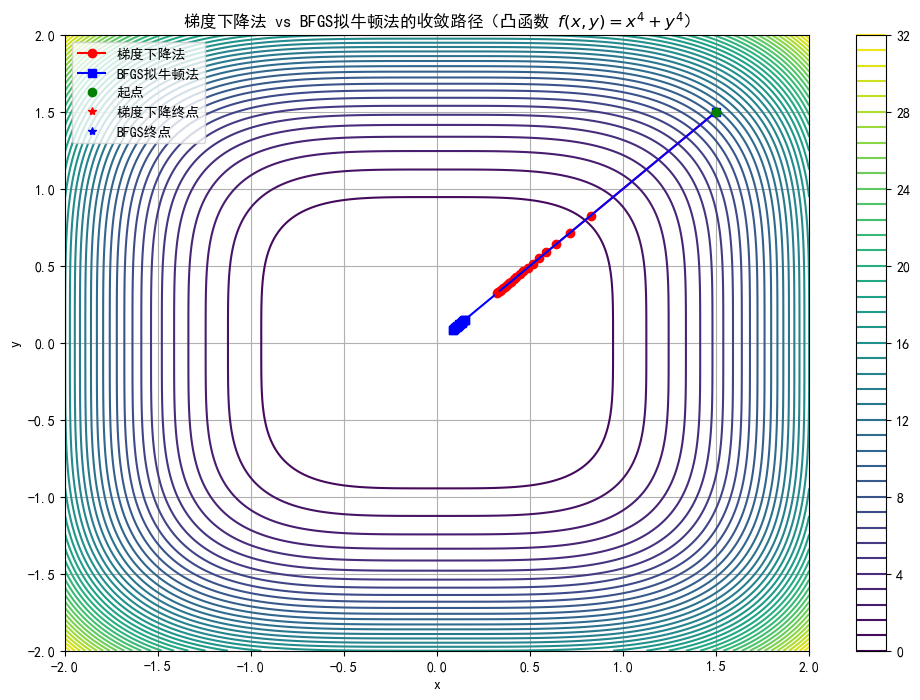

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# 定义目标函数
def f(x, y):
    return x**4 + y**4

# 梯度计算
def grad_f(x, y):
    df_dx = 4 * x**3
    df_dy = 4 * y**3
    return np.array([df_dx, df_dy])

# BFGS拟牛顿法
def bfgs(start, max_iter=20, tol=1e-6):
    path = [start]
    x, y = start
    grad = grad_f(x, y)
    # 初始逆海森矩阵近似为单位矩阵
    H = np.eye(2)
    
    for _ in range(max_iter):
        # 计算搜索方向
        p = -H @ grad
        # 线性搜索（简单固定步长，可替换为更复杂的线性搜索策略）
        alpha = 0.1
        # 更新点
        x_new = x + alpha * p[0]
        y_new = y + alpha * p[1]
        grad_new = grad_f(x_new, y_new)
        # 计算s和y
        s = np.array([x_new - x, y_new - y])
        y_diff = grad_new - grad
        # 计算rho
        rho = 1.0 / (y_diff @ s)
        # 更新逆海森矩阵
        I = np.eye(2)
        V = I - rho * np.outer(s, y_diff)
        H = V @ H @ V.T + rho * np.outer(s, s)
        # 更新变量
        x, y = x_new, y_new
        grad = grad_new
        path.append((x, y))
        # 检查收敛
        if np.linalg.norm(grad) < tol:
            break
    return np.array(path)

# 梯度下降法
def gradient_descent(start, learning_rate=0.05, max_iter=20, tol=1e-6):
    path = [start]
    x, y = start
    for _ in range(max_iter):
        grad = grad_f(x, y)
        x_new = x - learning_rate * grad[0]
        y_new = y - learning_rate * grad[1]
        path.append((x_new, y_new))
        # 检查收敛
        if np.linalg.norm(grad) < tol:
            break
        x, y = x_new, y_new
    return np.array(path)

# 初始点
start_point = (1.5, 1.5)

# 运行梯度下降法
gd_path = gradient_descent(start_point, learning_rate=0.05, max_iter=20)

# 运行BFGS拟牛顿法
bfgs_path = bfgs(start_point, max_iter=20)

# 创建网格用于绘图
x = np.linspace(-2, 2, 400)
y = np.linspace(-2, 2, 400)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# 绘制等高线
plt.figure(figsize=(12, 8))
contour = plt.contour(X, Y, Z, levels=50, cmap='viridis')
plt.colorbar(contour)

# 绘制梯度下降路径
plt.plot(gd_path[:,0], gd_path[:,1], 'o-', color='red', label='梯度下降法')

# 绘制BFGS拟牛顿法路径
plt.plot(bfgs_path[:,0], bfgs_path[:,1], 's-', color='blue', label='BFGS拟牛顿法')

# 标记起点和终点
plt.plot(start_point[0], start_point[1], 'go', label='起点')
plt.plot(gd_path[-1,0], gd_path[-1,1], 'r*', label='梯度下降终点')
plt.plot(bfgs_path[-1,0], bfgs_path[-1,1], 'b*', label='BFGS终点')

plt.legend()
plt.title('梯度下降法 vs BFGS拟牛顿法的收敛路径（凸函数 $f(x,y) = x^4 + y^4$）')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()
